In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_set=pd.read_csv("/content/train.csv")
test_set=pd.read_csv("/content/test.csv")

In [ ]:
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_set.drop('Id',axis=1,inplace=True)
test_id=test_set['Id'].astype(int)
test_set.drop('Id',axis=True,inplace=True)

In [ ]:
nan_features=np.array(np.where(train_set.isna().sum()>1000))
nan_features=list(nan_features)
type(nan_features)

list

In [ ]:
for i in nan_features:
   train_set.drop(train_set.columns[i],axis=1,inplace=True)
   test_set.drop(test_set.columns[i],axis=1,inplace=True)

In [ ]:
train_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


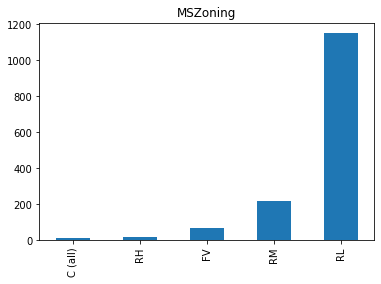

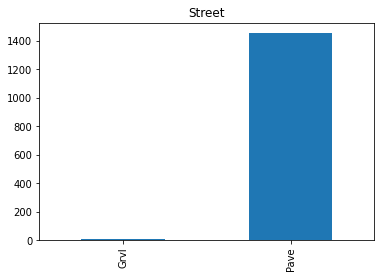

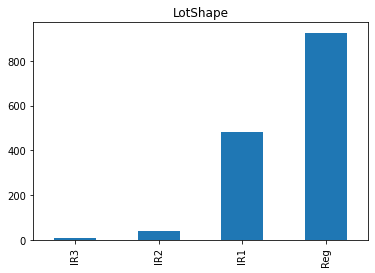

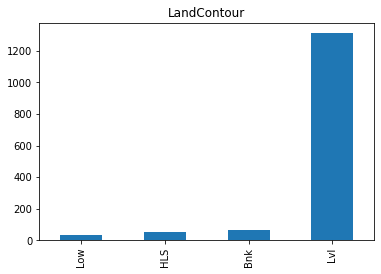

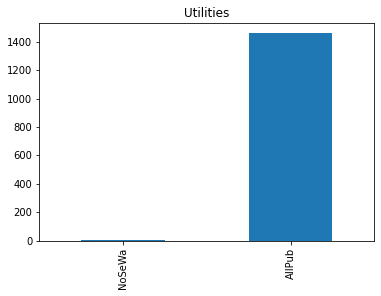

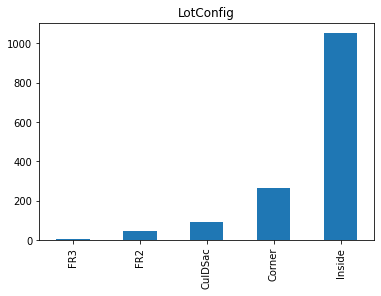

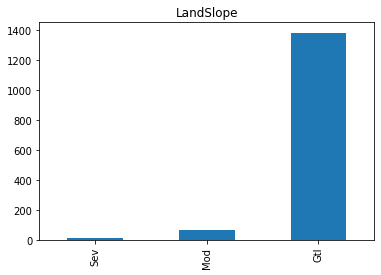

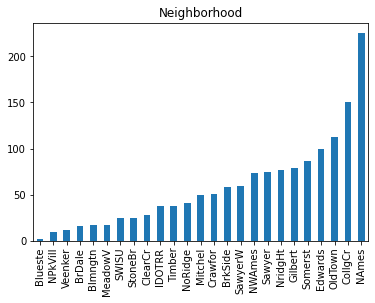

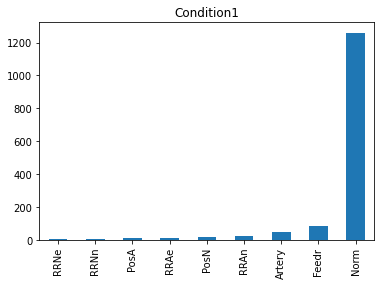

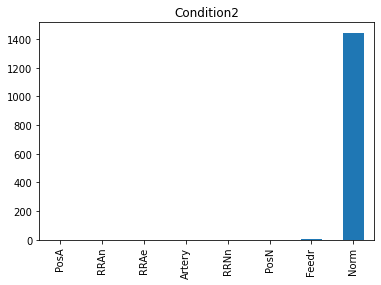

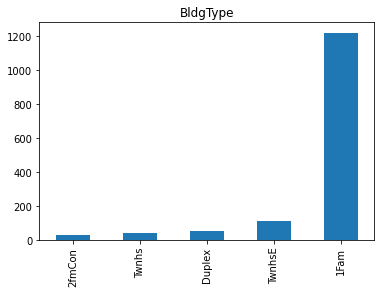

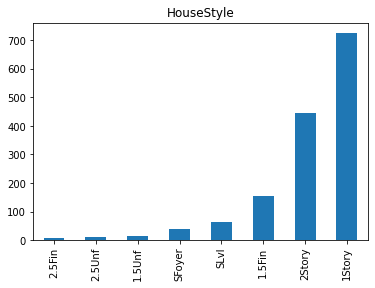

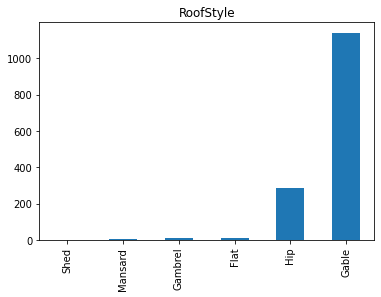

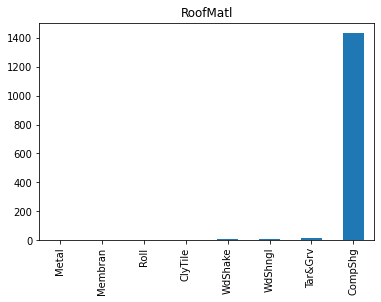

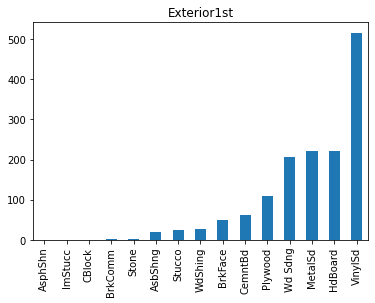

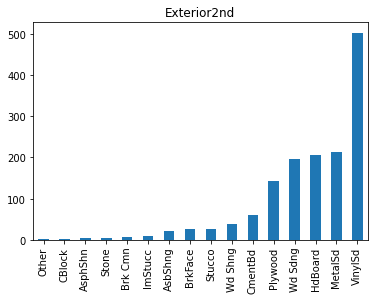

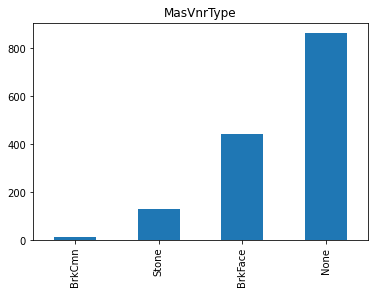

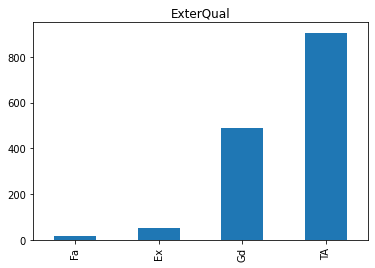

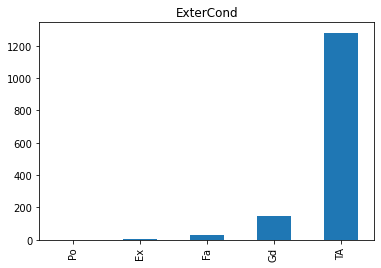

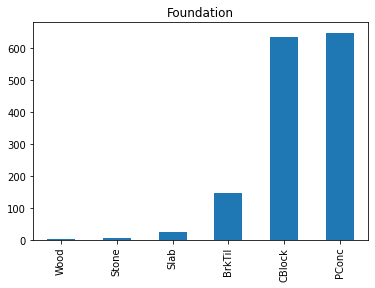

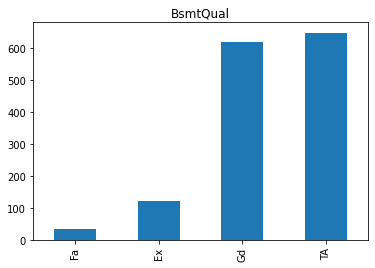

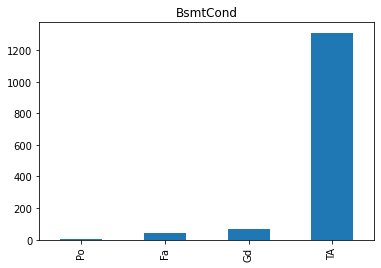

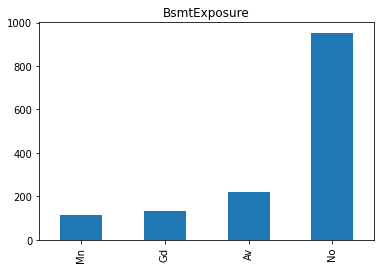

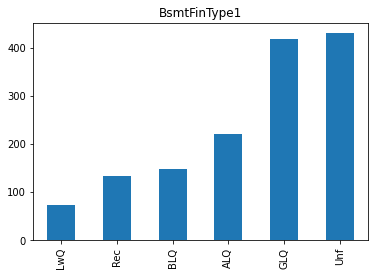

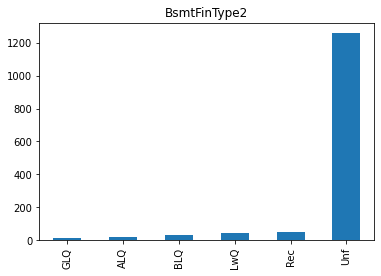

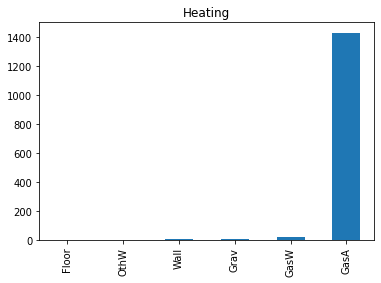

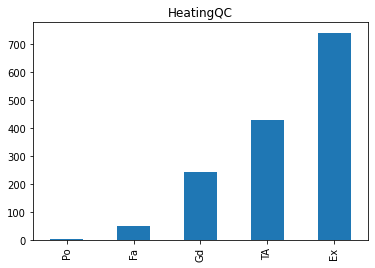

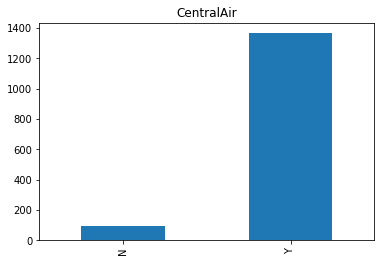

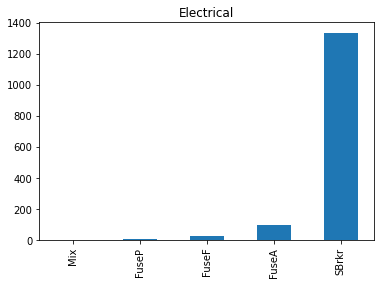

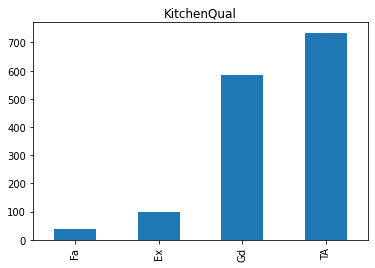

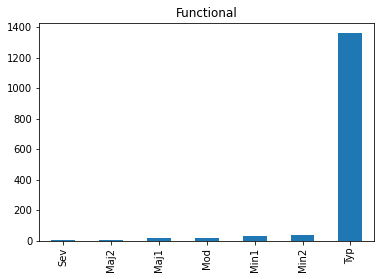

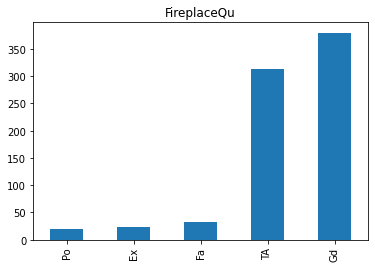

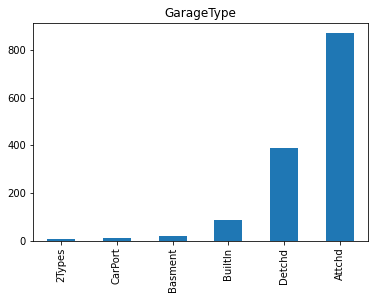

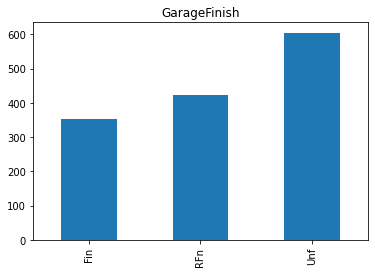

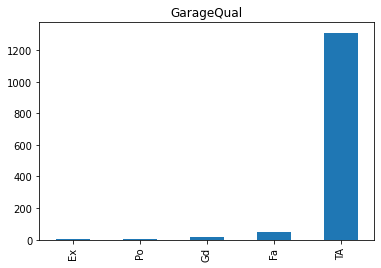

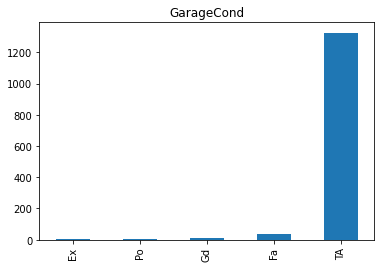

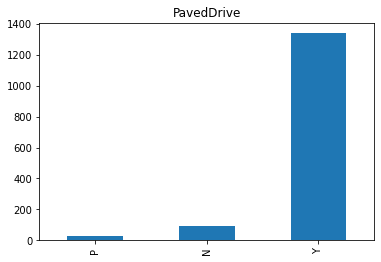

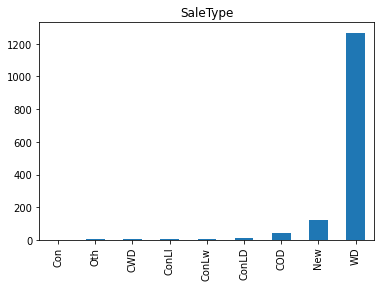

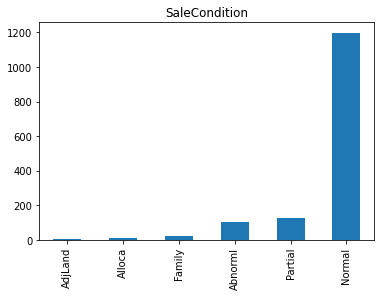

In [ ]:

obj_df=train_set.select_dtypes(['object'])
for column in obj_df.columns:
    ax=obj_df[column].value_counts().sort_values().plot(kind='bar')
    plt.title(column)
    plt.show()

In [ ]:
train_set.shape

(1460, 76)

Drop highly imbalanced columns

In [ ]:

percentage_list=[]
for column in train_set.columns:
    perc=train_set[column].value_counts(normalize=True)
    perc=perc.max()
    percentage_list.append([column,perc])

In [ ]:
#percentage_list
#train_set.drop('Street',axis=1,inplace=True)

In [ ]:

Ok=[]
for column,value in percentage_list:
   print(column,value)
    
   if float(value)>.90:
       try:
           train_set.drop(column,axis=1,inplace=True)
           test_set.drop(column,axis=1,inplace=True)
       except:
           Ok.append(column)

MSSubClass 0.36712328767123287
MSZoning 0.7883561643835616
LotFrontage 0.11906744379683597
LotArea 0.017123287671232876
Street 0.9958904109589041
LotShape 0.6335616438356164
LandContour 0.897945205479452
Utilities 0.9993150684931507
LotConfig 0.7205479452054795
LandSlope 0.9465753424657535
Neighborhood 0.1541095890410959
Condition1 0.863013698630137
Condition2 0.9897260273972602
BldgType 0.8356164383561644
HouseStyle 0.49726027397260275
OverallQual 0.2719178082191781
OverallCond 0.5623287671232877
YearBuilt 0.04589041095890411
YearRemodAdd 0.12191780821917808
RoofStyle 0.7815068493150685
RoofMatl 0.9821917808219178
Exterior1st 0.3527397260273973
Exterior2nd 0.3452054794520548
MasVnrType 0.5950413223140496
MasVnrArea 0.5929752066115702
ExterQual 0.6205479452054794
ExterCond 0.8780821917808219
Foundation 0.44315068493150683
BsmtQual 0.4560787069571328
BsmtCond 0.921293042867182
BsmtExposure 0.670182841068917
BsmtFinType1 0.3021784961349262
BsmtFinSF1 0.3198630136986301
BsmtFinType2 0.883

In [ ]:
print(train_set.shape,test_set.shape)

(1460, 56) (1459, 55)


In [ ]:
test_set.isna().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
LotShape           0
LandContour        0
LotConfig          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenQual        1
TotRmsAbvGrd       0
Fireplaces         0
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea   

In [ ]:

for column in test_set.columns:

    test_set[column].fillna(test_set[column].mode()[0],inplace=True)
    train_set[column].fillna(train_set[column].mode()[0],inplace=True)

In [ ]:
train_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,...,2,548,0,61,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,...,2,460,298,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,...,2,608,0,42,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,...,3,642,0,35,272,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,...,3,836,192,84,0,12,2008,WD,Normal,250000


In [ ]:
test_set.shape

(1459, 55)

In [ ]:
train_set['MSSubClass']=train_set['MSSubClass'].astype('object')
test_set['MSSubClass']=test_set['MSSubClass'].astype('object')

In [ ]:
df=train_set.select_dtypes('object')
df.shape

(1460, 27)

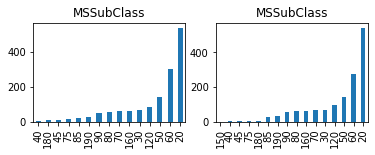

ok
ok
ok
ok
ok
ok
ok


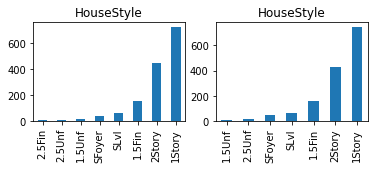

ok


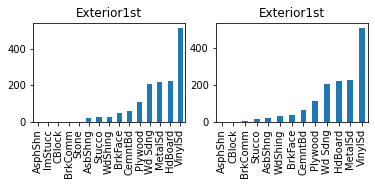

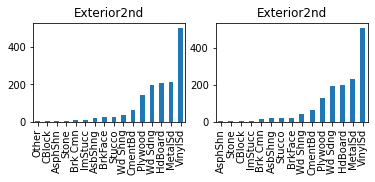

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


In [ ]:
to_drop=[]
for column in df.columns:
  if len(train_set[column].unique())!=len(test_set[column].unique()):
    plt.figure(1)
    
    plt.subplot(2,2,1)
    plt.title(column)
    to_drop.append(column)
    
    train_set[column].value_counts().sort_values().plot(kind='bar')
    plt.subplot(2,2,2)
    test_set[column].value_counts().sort_values().plot(kind='bar')
    plt.title(column)
    plt.show()
  else:
    
    print('ok')

In [ ]:
train_set=train_set[train_set['HouseStyle']!='2.5Fin']
train_set=train_set[train_set['Exterior1st']!='Stone']
train_set=train_set[train_set['Exterior1st']!='ImStucc']
train_set=train_set[train_set['Exterior2nd']!='Other']

In [ ]:
for column in to_drop:
  train_set.drop(column,axis=1,inplace=True)
  test_set.drop(column,axis=1,inplace=True)


In [ ]:
df=train_set.select_dtypes('object')
df.shape

(1448, 23)

In [ ]:
for column in df.columns:
  train_set=pd.concat([train_set,pd.get_dummies(train_set[column],prefix=column)],axis=1)
  train_set.drop(column,axis=1,inplace=True)
  test_set=pd.concat([test_set,pd.get_dummies(test_set[column],prefix=column)],axis=1)
  test_set.drop(column,axis=1,inplace=True)

In [ ]:
train_set.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
test_set.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,1,0,0,0,0,1,0
1,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,1,0
2,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,1,0
3,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,...,0,0,0,1,0,0,0,0,1,0
4,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
test_set.isna().sum()

LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 168, dtype: int64

In [ ]:
for column in train_set.columns:
  print(column)

LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
BsmtFullBath
FullBath
HalfBath
BedroomAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
MoSold
YrSold
SalePrice
MSZoning_C (all)
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_Bnk
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_Corner
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhood_Sawyer
Neighborhood_S

In [ ]:
label=train_set['SalePrice']
train_set.drop('SalePrice',axis=1,inplace=True)

#Make Pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, KFold
from sklearn.impute import SimpleImputer
import xgboost
# evaluation
from sklearn.metrics import f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor

In [ ]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
imp.fit(train_set)
X=imp.transform(train_set)
y=imp.transform(test_set)

In [ ]:
X_df=pd.DataFrame(X,columns=train_set.columns)
X_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
y_df=pd.DataFrame(y,columns=test_set.columns)
y_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,324.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,1017.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#imp=Normalizer()
#imp.fit(X_df)
#X=imp.transform(X_df)
#y=imp.transform(y_df)

In [ ]:
X_df=pd.DataFrame(X,columns=train_set.columns)
X_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
y_df=pd.DataFrame(y,columns=test_set.columns)
y_df.head()
for column in y_df.columns:
    X_df[column].astype(int)
    y_df[column].astype(int)

In [ ]:
X=round(.8*len(X_df))
x_train=X_df[:X]
x_test=X_df[X:]
y_train=label[:X]
y_test=label[X:]

In [ ]:
y_train.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [ ]:
x_train.dtypes

LotFrontage              float64
LotArea                  float64
OverallQual              float64
OverallCond              float64
YearBuilt                float64
                          ...   
SaleCondition_AdjLand    float64
SaleCondition_Alloca     float64
SaleCondition_Family     float64
SaleCondition_Normal     float64
SaleCondition_Partial    float64
Length: 168, dtype: object

In [ ]:
y_test.shape

(290,)

In [ ]:
x_test.shape

(290, 168)

In [ ]:
params={'max_depth':[2,10,20],
        'learning_rate':[0.1,.01,.05], 
        'n_estimators':[50,100,200,300,400]
        
}
#         
#}
#params={'svc__gamma':['auto','scale']}

In [ ]:
duplicate_columns = x_train.columns[x_train.columns.duplicated()]

In [ ]:
duplicate_columns

Index([], dtype='object')

In [ ]:
grid=xgboost.XGBRegressor(n_estimators=200)
#grid=GridSearchCV(model,param_grid=params,cv=5)

In [ ]:
grid.fit(x_train,y_train)

[14:38:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=200)

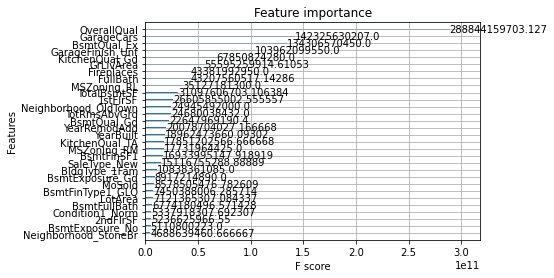

In [ ]:
plot_importance(grid,max_num_features=30,importance_type='gain')
plt.show()

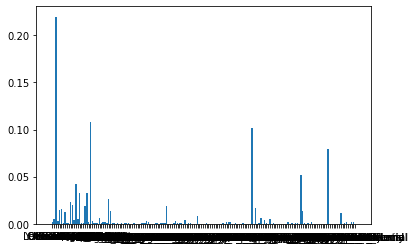

In [ ]:
plt.bar(x_train.columns,grid.feature_importances_)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance

In [ ]:
score=cross_val_score(grid,x_test,y_test,cv=5,scoring='max_error')
score

[14:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:38:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:38:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:38:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([-402971.78125, -163197.78125, -369941.625  , -135918.40625,
        -88164.28125])

In [ ]:
pred=grid.predict(x_test)

In [ ]:
pred

array([204126.72 , 623218.1  , 146357.1  , 160670.66 , 158290.67 ,
       240051.92 , 220812.5  , 349688.06 , 129148.65 , 112544.57 ,
       130214.34 ,  96728.62 , 252999.61 , 296413.56 , 537862.8  ,
       144270.84 , 196222.   , 127305.78 , 124711.77 , 186963.47 ,
       194881.27 , 132959.28 , 182192.98 , 128171.59 , 162489.06 ,
       144023.86 , 163386.17 , 241182.45 , 157041.47 , 176825.67 ,
       143562.55 ,  95505.67 , 199811.4  , 129183.44 , 197482.3  ,
       149745.12 , 258914.69 , 109047.31 , 201839.08 , 141308.98 ,
       272736.97 , 190961.77 , 214496.64 ,  95071.48 , 125415.41 ,
       126468.625, 115564.484, 132814.69 , 265653.75 ,  76817.44 ,
        96410.43 , 110093.234, 125753.25 , 157813.39 , 158412.34 ,
       185322.47 , 136919.19 , 217087.08 , 142607.1  , 367222.34 ,
       138810.12 , 188824.45 , 142628.98 , 104871.44 , 139695.27 ,
       125138.57 , 143015.33 , 163774.38 , 218234.23 , 142518.34 ,
       219169.73 , 206253.23 , 246119.73 , 182308.03 , 411221.

In [ ]:
score=mean_squared_error(y_test,pred)
score

712888982.9792739

In [ ]:
result=grid.predict(y_df)
result=result.round().astype(int)

In [ ]:
len(test_id)

1459

In [ ]:
len(result)

1459

In [ ]:
test_id=pd.concat([test_id,pd.DataFrame(data=result,columns=['SalePrice'])],axis=1)

In [ ]:
test_id

,Id,SalePrice
0,1461,123349
1,1462,159450
2,1463,186107
3,1464,190568
4,1465,186500
...,...,...
1454,2915,76099
1455,2916,76724
1456,2917,176018
1457,2918,122956


In [ ]:
test_id.dropna()

,Id,SalePrice
0,1461,123349
1,1462,159450
2,1463,186107
3,1464,190568
4,1465,186500
...,...,...
1454,2915,76099
1455,2916,76724
1456,2917,176018
1457,2918,122956


In [ ]:
test_id.Id.astype(int)

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [ ]:
test_id.to_csv('Coding_nomads.csv',index=False)